# Import packages

In [5]:
import pandas as pd
import numpy as np
import os

import matplotlib.pyplot as plt
import pickle

# package for automated isotherm fitting
from isofit import best_isomodel

# Finishing beep

In [6]:
import winsound as sd
import time
def finishbeep(n):
    for ii in range(n):
        sd.Beep(1000,300)
        sd.Beep(2000,200)
        time.sleep(0.8)
# Test        
finishbeep(3)

# Import csv files

## Base pathway

In [7]:
basepath = os.getcwd()

## File Names & AD names
File names: ch4_fnames / co2_fnames <br>
AD names: AD_names_ch4 / AD_names_co2

In [8]:
os.chdir(basepath)
#print(os.listdir())
os.chdir('Pure')
os.chdir('CH4_zeolite')
ch4_fnames = os.listdir()
AD_names_ch4 = []
for fnn in ch4_fnames:
    fn_spl = fnn.split('s')
    #print(fn_spl[0])
    AD_names_ch4.append(fn_spl[0])
    
os.chdir(basepath)
os.chdir('Pure')
os.chdir('CO2_zeolite')
co2_fnames = os.listdir()
AD_names_co2 = []
for fnn in co2_fnames:
    fn_spl = fnn.split('s')
    AD_names_co2.append(fn_spl[0])

for fch4,fco2 in zip(AD_names_ch4, AD_names_co2):
    #print(fch4, fco2)
    if fch4 != fco2:
        print('WARNING: Not consistent!!!')
        print(fch4, fco2)
os.chdir(basepath)

## Load csv files (CH4)

In [9]:
data_q_ch4 = []
data_P_ch4 = []
data_ch4 = []
os.chdir(basepath +'/Pure' +'/CH4_zeolite')
n_p = 0

for fn in ch4_fnames:
    df_tmp = pd.read_csv(fn)
    data_P_ch4.append(df_tmp['P'].to_numpy())
    data_q_ch4.append(df_tmp['q'].to_numpy())
    data_ch4.append(df_tmp.to_numpy())
    p_tmp = data_P_ch4[-1]    
#    if len(data_P_ch4[-1]) - n_p != 0:
#        print(fn, 'has problem:')
#        print('previous points = ', n_p, ', this files = ', len(data_P_ch4[-1]))
    n_p = len(data_P_ch4[-1])

In [10]:
print(len(data_ch4))
print(data_ch4[-1])

369
[[ 0.1         0.10507545]
 [ 0.3         0.28550274]
 [ 0.5         0.44278045]
 [ 0.7         0.56508156]
 [ 0.9         0.67017261]
 [ 1.          0.72321223]
 [ 2.          1.12179994]
 [ 3.          1.36700547]
 [ 4.          1.49735769]
 [ 5.          1.58423491]
 [ 6.          1.64285518]
 [ 7.          1.70944856]
 [ 8.          1.74199111]
 [ 9.          1.77761784]
 [10.          1.7996388 ]
 [20.          1.93600337]
 [30.          1.97446463]
 [40.          1.99368746]
 [50.          2.0065807 ]
 [51.          2.0192971 ]]


## Load csv files (CO2)

In [11]:
data_co2 = []
os.chdir(basepath +'/Pure' +'/CO2_zeolite')
n_p = 0

for fn in co2_fnames:
    df_tmp = pd.read_csv(fn)
    data_co2.append(df_tmp.to_numpy())
    p_tmp = data_co2[-1][:,0]    
    if len(data_co2[-1][:,0]) - n_p != 0:
        print(fn, 'has problem:')
        print('previous points = ', n_p, ', this files = ', len(p_tmp))
    n_p = len(p_tmp)
os.chdir(basepath)

ABW-0single_CO2.csv has problem:
previous points =  0 , this files =  19


In [12]:
print(len(data_co2))

369


# Fit the data

## TEST CH4

In [13]:
pq_tmp = data_ch4[0]
p_tmp = pq_tmp[:,0]
q_tmp = pq_tmp[:,1]
fit_res_tmp = best_isomodel(p_tmp, q_tmp)
isofn_tmp,param_tmp, modeltype_tmp, err_tmp = best_isomodel(p_tmp, q_tmp)
print(modeltype_tmp)

Lang


## Fit and pickle (CH4)

In [14]:
model_list_ch4 = []
arg_large_err_list = []
modeltype_list_ch4 = []
par_list_ch4 = []
cc = 0
for dd in data_ch4[]:
    p_tmp = dd[:,0]
    q_tmp = dd[:,1]
    isofn_tmp,par_tmp, modeltype_tmp, err_tmp = best_isomodel(p_tmp, q_tmp)
    print(modeltype_tmp, ': ', err_tmp)
    model_list_ch4.append(isofn_tmp)
    par_list_ch4.append(par_tmp)
    if err_tmp > 0.05:
        arg_large_err_list.append(cc)
    cc = cc+1
arg_larg_err_ch4 = np.array(arg_large_err_list)
finishbeep(4)

Lang :  0.01234184332860964
DSLa :  0.008595705078945613
Lang :  0.04670501870162445
Lang :  0.0775586684398685
Lang :  0.0775586684398685
Lang :  0.016664800060891046
Lang :  0.0011395567376522278
Lang :  0.0015120545605119976
DSLa :  0.0018907224122557203
DSLa :  0.004109059135921352


In [48]:
os.chdir(basepath)
f = open('iso_ch4.bin','wb')
pickle.dump(par_list_ch4, f)
f.close()
print(os.listdir())

['.ipynb_checkpoints', 'ad_list.csv', 'CO2_10_CH4_90', 'CO2_25_CH4_75', 'CO2_75_CH4_25', 'CO2_90_CH4_10', 'CO2_CH4_For_IAST.zip', 'iso_ch4.bin', 'iso_co2.bin', 'Pure', 'PureIso_notebook.ipynb', 'reorganized', 'Untitled.ipynb']


## Check the results with large errors (CH4)

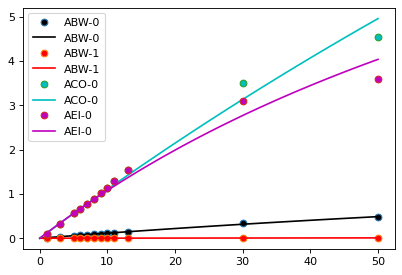

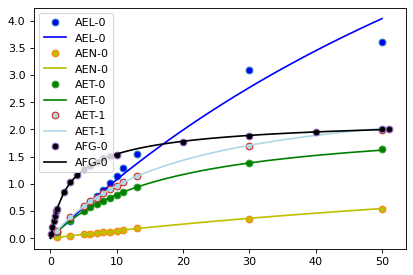

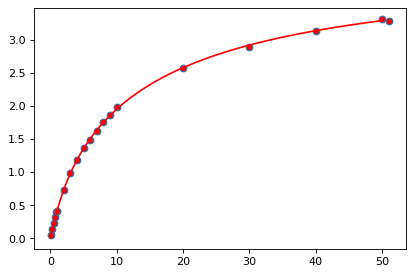

In [16]:
plt.figure(dpi = 80)
color_list = ['k','r','c','m','b','y','g','lightblue']
cc = 0
#for argg in arg_large_err_list:
for argg in range(10):
    dd = data_ch4[argg]
    lc = color_list[cc%len(color_list)]
    plt.plot(dd[:,0],dd[:,1], 'o',
             markerfacecolor = lc,
             label = AD_names_ch4[argg])
    p_ran = np.linspace(0,50, 51)
    q_pre = model_list_ch4[argg](p_ran)
    plt.plot(p_ran,q_pre, 
             color = lc,
             label = AD_names_ch4[argg])
    cc = cc+1
    if cc % 5 == 4:
        plt.legend()
        plt.figure(dpi = 80)

In [63]:
for ii in arg_larg_err_ch4:
    print(AD_names_ch4[ii], '{0:5d}'.format(ii), ' N_par = ', len(par_list_ch4[ii]))

AEI-0     3  N_par =  2
AEL-0     4  N_par =  2
APD-0    21  N_par =  3
DFT-0    71  N_par =  3
GIS-0   115  N_par =  2
GIS-4   118  N_par =  2
GIS-5   119  N_par =  2
GIS-6   120  N_par =  2
LTJ-0   190  N_par =  2
MON-0   215  N_par =  4
MON-1   216  N_par =  2
NAB-0   238  N_par =  2
NPO-0   244  N_par =  4
NSI-0   246  N_par =  3
RSN-0   274  N_par =  4
RWR-0   281  N_par =  2
RWR-1   282  N_par =  4
SBN-0   290  N_par =  2
THO-1   342  N_par =  3
UEI-0   351  N_par =  2


In [59]:
indd = 290
p_tmp = data_ch4[indd][0]
q_tmp = data_ch4[indd][1]
#res = find_par(Quad,3,p_tmp,q_tmp,method_list)
parsol_test, fnsol_test,parall_test,fnall_test = find_par(Quad,3,p_tmp,q_tmp,method_list)
#res = best_isomodel(p_tmp,q_tmp,tol = 1E-5)
print(fnall_test)
#print(par_list_ch4[290])

[0.01502816547023318, 7.837591105165645e-24, 0.001768870760593564, 1.978341514494582]


## Fit and pickle (CO2)

In [64]:
model_list_co2 = []
arg_large_err_list = []
modeltype_list_co2 = []
par_list_co2=[]
cc = 0
for dd in data_co2:
    p_tmp = dd[:,0]
    q_tmp = dd[:,1]
    isofn_tmp,par_tmp, modeltype_tmp, err_tmp = best_isomodel(p_tmp, q_tmp)
    print(modeltype_tmp, ': ', err_tmp)
    model_list_co2.append(isofn_tmp)
    par_list_co2.append(par_tmp)
    if err_tmp > 0.05:
        arg_large_err_list.append(cc)
    cc = cc+1
arg_larg_err_co2 = np.array(arg_large_err_list)
finishbeep(4)

Lang :  0.053708884851462815
DSLa :  0.09307698224445875
Lang :  0.03753266262469802
DSLa :  0.001699450172725122
DSLa :  0.00248063578009908
DSLa :  0.059505645224070626
Quad :  0.007784610258610683
Lang :  0.009458035593726332
DSLa :  0.0005860725145679853
DSLa :  0.013922852351066078
Lang :  0.006120781724969536
DSLa :  0.001424321779487322
DSLa :  0.0068821477965242996
Lang :  0.003345110960782222
Lang :  0.024961098937585528
DSLa :  0.003902413840891372
DSLa :  0.001654976470126604
DSLa :  0.007323698978682351
Lang :  0.01100741525394326
DSLa :  0.21795448535405232
Lang :  0.0628048366804997
DSLa :  0.06760492312308898
DSLa :  0.0010684534210448089
Lang :  0.005895445495820639
DSLa :  0.004983476579666174
Lang :  0.002197846924446979
Lang :  0.00010592332095583279
DSLa :  0.0025595763016575293
Lang :  0.004662629771900045
Lang :  0.004011889480158387
Quad :  0.015642272943411813
Lang :  0.05568929234636597
DSLa :  0.20632769622300706
DSLa :  0.004232421153402311
DSLa :  0.00122763

DSLa :  0.11562809985956013
Lang :  0.030238060825416937
DSLa :  0.002078712354246378
Lang :  0.01507208736410342
DSLa :  0.004140379951882669
Lang :  0.0042634974772574495
DSLa :  0.0018795193974423324
Lang :  0.005632270247275229
DSLa :  0.025879276424496864
Quad :  0.04413526845261026
Quad :  0.036767665935702645
DSLa :  0.003949335525361227
DSLa :  0.0014784057013181042
Lang :  0.0041036285437594305
DSLa :  0.0026348876628314076
DSLa :  0.001956940999866332
DSLa :  0.0037316283716780905
Lang :  0.0040648774110605196
DSLa :  0.0008900554992668804
Lang :  0.009453321687031144
Lang :  0.004652227049899257
Lang :  0.006296274419473317
Lang :  0.004110028244263342
Lang :  0.005161661395983966
Lang :  0.007348696924558158
Lang :  0.004258706769937973
DSLa :  0.005823303742936711
Lang :  0.00574258121948042
DSLa :  0.001205041764773559
DSLa :  0.002422580882535418
Quad :  0.08252172051207211
Quad :  0.0171036919536469
Lang :  0.02176125918666036
Quad :  0.03746818720525955
DSLa :  0.00784

In [65]:
os.chdir(basepath)
f = open('iso_co2.bin','wb')
pickle.dump(par_list_co2, f)
f.close()
print(os.listdir())

['.ipynb_checkpoints', 'ad_list.csv', 'CO2_10_CH4_90', 'CO2_25_CH4_75', 'CO2_75_CH4_25', 'CO2_90_CH4_10', 'CO2_CH4_For_IAST.zip', 'iso_ch4.bin', 'iso_co2.bin', 'Pure', 'PureIso_notebook.ipynb', 'reorganized', 'Untitled.ipynb']


## Check the results with large errors (CO2)

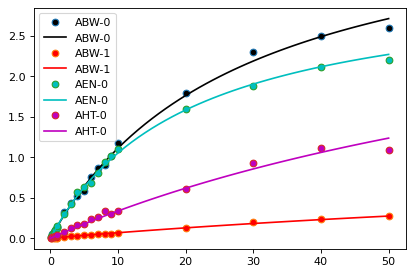

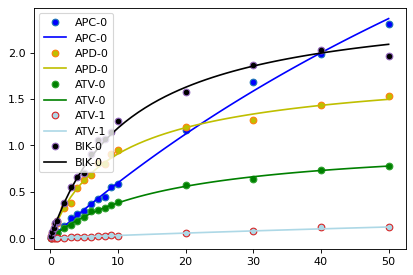

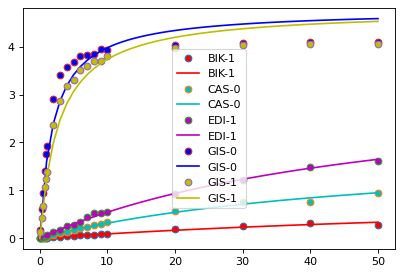

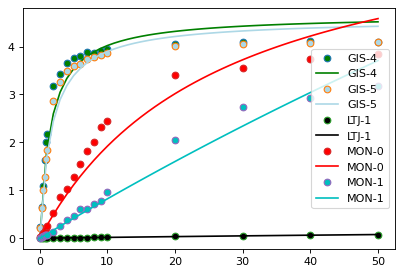

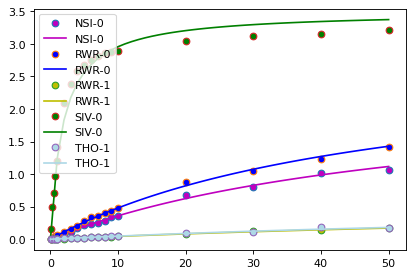

<Figure size 480x320 with 0 Axes>

In [67]:
plt.figure(dpi = 80)
color_list = ['k','r','c','m','b','y','g','lightblue']
cc = 0
for argg in arg_larg_err_co2:
    dd = data_co2[argg]
    lc = color_list[cc%len(color_list)]
    plt.plot(dd[:,0],dd[:,1], 'o',
             markerfacecolor = lc,
             label = AD_names_co2[argg])
    p_ran = np.linspace(0,50, 51)
    q_pre = model_list_co2[argg](p_ran)
    plt.plot(p_ran,q_pre, 
             color = lc,
             label = AD_names_co2[argg])
    cc = cc+1
    if cc % 5 == 4:
        plt.legend()
        plt.figure(dpi = 80)

In [68]:
for ii in arg_larg_err_co2:
    print(AD_names_co2[ii], '{0:5d}'.format(ii), ' N_par = ', len(par_list_co2[ii]))

ABW-0     0  N_par =  2
ABW-1     1  N_par =  4
AEN-0     5  N_par =  4
AHT-0    19  N_par =  4
APC-0    20  N_par =  2
APD-0    21  N_par =  4
ATV-0    31  N_par =  2
ATV-1    32  N_par =  4
BIK-0    42  N_par =  3
BIK-1    43  N_par =  2
CAS-0    54  N_par =  4
EDI-1    80  N_par =  4
GIS-0   115  N_par =  2
GIS-1   116  N_par =  3
GIS-4   118  N_par =  3
GIS-5   119  N_par =  2
LTJ-1   191  N_par =  2
MON-0   215  N_par =  2
MON-1   216  N_par =  2
NSI-0   246  N_par =  4
RWR-0   281  N_par =  2
RWR-1   282  N_par =  4
SIV-0   312  N_par =  3
THO-1   342  N_par =  2
